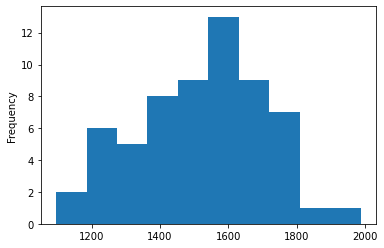

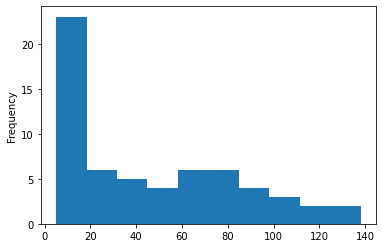

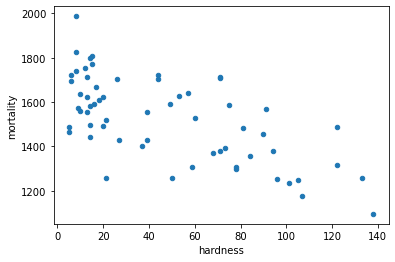

In [51]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''
Распределение значений для смертности близко к нормальному
Распределение для жёсткости воды мало похоже на нормальное, возможно это
может повлиять на качество вычисления корреляций по Пирсону

Исходя из графика  есть обратная корреляция между жёсткостью воды и  смертностью
явных выбросов нет, зависимость похожа на линейную 
'''
df = pd.read_csv("water.csv")
df.mortality.plot(kind="hist")
plt.show()
df.hardness.plot(kind="hist")
plt.show()
df.plot(kind='scatter', y = 'mortality', x = "hardness")

In [36]:
'''
Исходя из вычислений есть средняя зависимость между  жёсткостью воды и смертностью. 
Спирман даёт немного меньший результат, я бы ориентировался на него, так как распределение для жёсткости воды было не нормальным'''

print(df[['hardness', 'mortality']].corr())
print(df[['hardness', 'mortality']].corr(method='spearman'))



           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [37]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:

X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
cf_det = model.score(X_test, y_test)
print("коэффициент  детерминации ", cf_det)

Коэфицент детерминации  0.5046490611017092


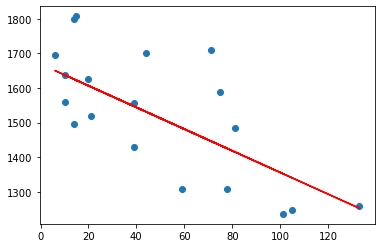

In [39]:
'''
как видно из коэфицента детерминации и графика  модель  давольно плохо предсказывает новые значения

'''

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

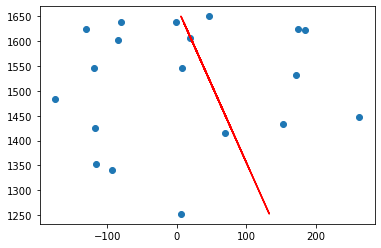

In [40]:
'''
остатки довольно хаотичны, каких-то закономерностей вроде нет, в этом плане вроде все нормально
'''
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.plot(X_test, y_pred, c='r')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


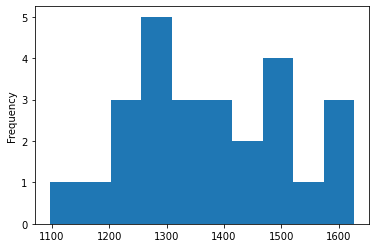

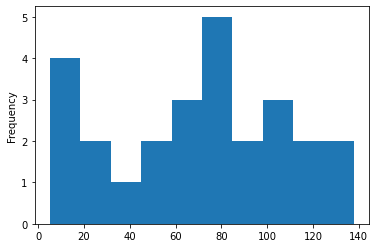

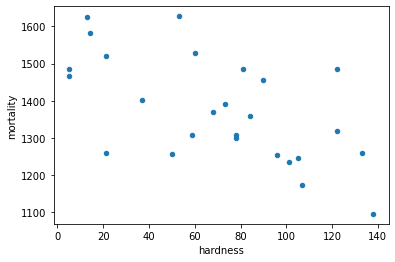

Пирсон 
            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Спирман 
            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
Коэфицент детерминации  -2.551922301235205
Тестовые данные и линия регрессии


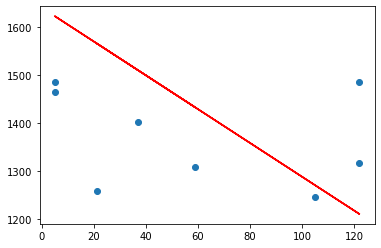

Остатки


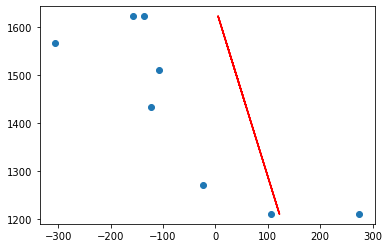

In [63]:
'''
Для Юга значений мало, скорее всего не получится создать хорошую регрессионную модель
Есть средняя, обратная корреляция между жёсткостью воды и  смертностью
Регрессионная модель получилось хуже наивной что видно из коэффициента  детерминации, да и по графику видно что
получилось не очень
По графику остатков можно предположить какую-то не линейную зависимость
'''

df_south = df.loc[df["location"]=='South']
df_south.info()
df_south.mortality.plot(kind="hist")
plt.show()
df_south.hardness.plot(kind="hist")
plt.show()
df_south.plot(kind='scatter', y = 'mortality', x = "hardness")
plt.show()
print("Пирсон \n", df_south[['hardness', 'mortality']].corr())
print("Спирман \n", df_south[['hardness', 'mortality']].corr(method='spearman'))

X = df_south[['hardness']]
y = df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
cf_det = model.score(X_test, y_test)
print("коэффициент детерминации ", cf_det)
print("Тестовые данные и линия регрессии")
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.show()
print("Остатки")
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.plot(X_test, y_pred, c='r')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


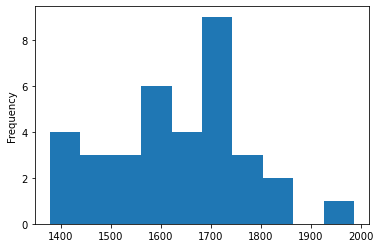

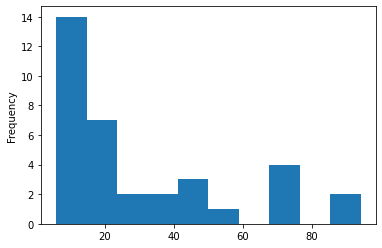

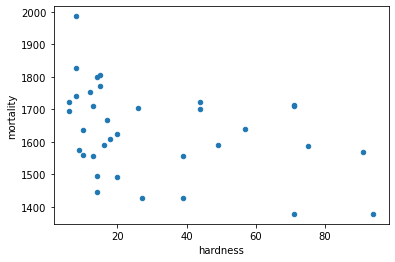

Пирсон 
            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Спирман 
            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
Коэфицент детерминации  0.018885304285745863
Тестовые данные и линия регрессии


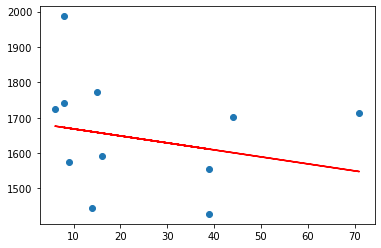

Остатки


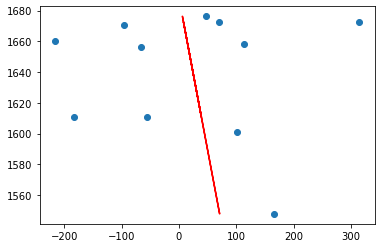

In [69]:
'''
Для Севера значений мало, скорее всего не получится создать хорошую регрессионную модель
Распределение величин мало похоже на нормальное, значение по Пирсону скорее всего будет не очень точным да и зависимость не 
похожа на линейную
Есть слабая, обратная корреляция между жёсткостью воды и  смертностью
На графике вроде корреляция просматривается, но большой разброс в значениях да и значений маловато
Регрессионная модель получилось практически на уровне наивной
По графику остатков нельзя сказать о какой-то зависимости
'''
df_north = df.loc[df["location"]=='North']
df_north.info()
df_north.mortality.plot(kind="hist")
plt.show()
df_north.hardness.plot(kind="hist")
plt.show()
df_north.plot(kind='scatter', y = 'mortality', x = "hardness")
plt.show()
print("Пирсон \n", df_north[['hardness', 'mortality']].corr())
print("Спирман \n", df_north[['hardness', 'mortality']].corr(method='spearman'))

X = df_north[['hardness']]
y = df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
cf_det = model.score(X_test, y_test)
print("коэффициент детерминации ", cf_det)
print("Тестовые данные и линия регрессии")
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.show()
print("Остатки")
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.plot(X_test, y_pred, c='r')
